# Random Forest Model on Activities (Include Hyperparameter tuning by RandomSearchCV)
GONG ZERUI 04/14

### 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

### 2. Split train-test datasets

In [2]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])


y_train = df_train.Activity
X_train = df_train.drop(['subject', 'Activity'], axis=1)

y_test = df_test.Activity
X_test = df_test.drop(['subject', 'Activity'], axis=1)


print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', X_test.shape)
print('y_test : ', y_test.shape)


X_train :  (7352, 561)
y_train :  (7352,)
X_test :  (2947, 561)
y_test :  (2947,)


### 3. Build Random Forest Model with Hyperparameter Tuning (RandomizedSearchCV)

In [3]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=2, stop=50, num=2)]


In [4]:
# Create the random grid
param = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
}

rf_Model = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rf_rs = RandomizedSearchCV(
    estimator=rf_Model, param_distributions=param, random_state = 42
)


In [5]:
rf_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 50],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42)

### 4. Print out best random search parameters


In [6]:
print("Best estimator : ", rf_rs.best_estimator_)
print("Best set of parameters : ", rf_rs.best_params_)

Best estimator :  RandomForestClassifier(max_depth=50, n_estimators=157)
Best set of parameters :  {'n_estimators': 157, 'max_depth': 50}


### 5. Print out Accuracy

In [7]:
from sklearn.metrics import accuracy_score

y_pred = rf_rs.predict(X_test)
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest with hyperparameter tuning : ", rf_accuracy)

Accuracy using Random forest with hyperparameter tuning :  0.9246691550729556


### 6. Print out confusion matrix

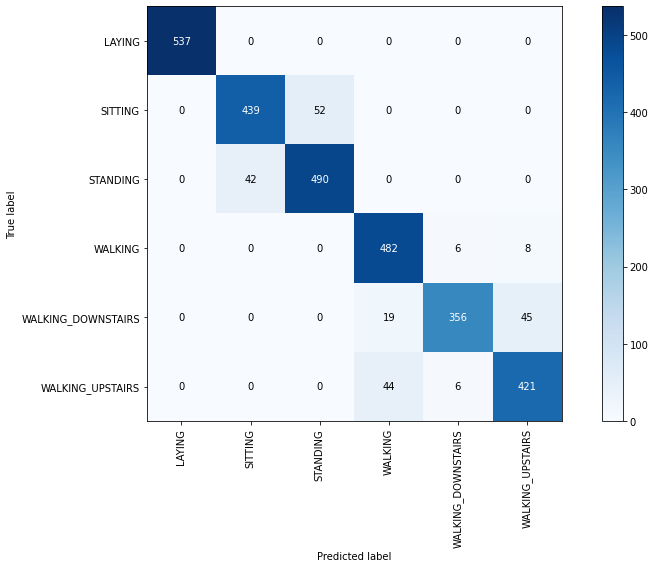

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test.values, y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(cm, cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()



